# Optimizing Heart Health Interventions through Classifier Evaluation

## Introduction:

This project's main goal is to create and assess a classifier that may be used to identify people at a medical facility who are concerned about their heart health. The dataset used for this project includes a wide range of demographic and health-related data for a group of patients, as well as a categorization variable that indicates the seriousness of each person's heart health issues. The ultimate objective is to forecast the proper heart health categorization for new patients based on their demographic information, allowing for the successful implementation of individualized therapies.


## Task 1: Exploratory Data Analysis (EDA)
## Task 2: Implement and Evaluate K-Nearest-Neighbor Classifier



## Data Description:
## Heart disease data set from Cleveland Data



1. Age: Indicates the person's age. (29-77 years)<br>
2. Sex: Indicates the person's gender (1 = male, 0 = female).<br>
3. Chest discomfort: Indicates the nature of the discomfort in the chest.<br>
   - 1: Typical angina<br>
   - 2: Atypical angina<br>
   - 3: Non-anginal pain<br>
   - 4: Asymptomatic<br>
4. Resting blood pressure (mmHg): Displays its resting blood pressure in millimeters of mercury.<br>
5. Serum cholesterol (mg/dl): Shows the serum cholesterol level in mg/dl.<br>
6. Fasting blood sugar: Indicates if the fasting blood sugar is > 120 mg/dl or not.<br>
   - 0: Fasting blood sugar <= 120 mg/dl<br>
   - 1: Fasting blood sugar > 120 mg/dl<br>
7. Resting ECG: Shows the resting electrocardiographic results.<br>
   - 0: Normal<br>
   - 1: ST-T wave abnormality<br>
   - 2: Left ventricular hypertrophy<br>
8. Maximum heart rate attained: Shows the highest heart rate achieved.<br>
9. Exercise-induced angina: Indicates if exercise induced angina or not.<br>
   - 0: No<br>
   - 1: Yes<br>
10. Exercise-induced ST depression compared to rest: Shows the ST depression score.<br>
11. Peak exercise ST segment: Shows the peak exercise ST segment.<br>
   - 1: Upsloping<br>
   - 2: Flat<br>
   - 3: Downsloping<br>
12. Flourosopy number to vessel: Shows the fluoroscopy number to vessel.<br>
13. Thalassemia: Shows the thalassemia value.<br>
   - 3: Normal<br>
   - 6: Fixed defect<br>
   - 7: Reversible defect<br>
14. Presence of heart disease: Indicates the presence of heart disease.<br>
   - 0: No<br>
   - 1-4: Yes







In [1]:
# import all the requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from scipy import stats
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn import preprocessing    
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from itertools import cycle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize

In [2]:
Cleveland_data = pd.read_csv("Cleveland Data CLEANED AND TRIMMED.csv") #read_data
Cleveland_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


## Data Prep

In [3]:
# Check for Null Values
print("NULL:",Cleveland_data.isnull().any())


NULL: id          False
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool


In [4]:
# Check for Duplicate Values

print("Duplicate:",Cleveland_data.duplicated().values.any())

Duplicate: False


In [5]:
#Drop the id column because it is irrelevant 

Cleveland_data.drop(columns= ['id'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,0,0,152,0,0.0,2,0,3,0
278,57,1,2,154,232,0,2,164,0,0.0,1,1,3,1
279,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2


In [6]:
#Calculate the mode and replace
caMod = stats.mode(Cleveland_data['ca'])
thalMod = stats.mode(Cleveland_data['thal'])

#Replace 
Cleveland_data.loc[Cleveland_data.ca==-9, 'ca'] = caMod[0][0]
Cleveland_data.loc[Cleveland_data.thal==-9, 'thal'] = thalMod[0][0]

#we can now see the min and max values are within the expected range for all the features
Cleveland_data.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.659574,4.666667,0.907801
std,81.550598,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.934356,1.937334,1.224894
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,71.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,141.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,211.750000,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,282.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


0    157
1     50
3     32
2     31
4     12
Name: num, dtype: int64

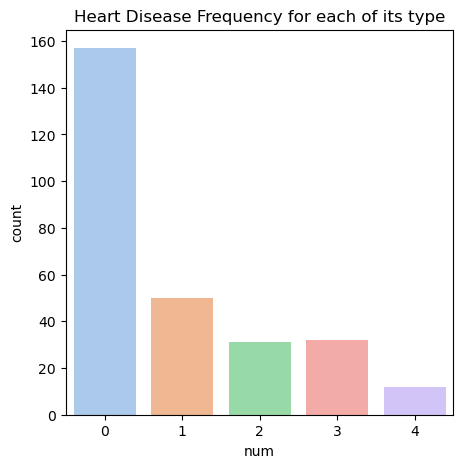

In [7]:
# This shows us that the data is unevenly distributed with most of the data being num equals to 0

plt.figure(figsize=(5,5))
plt.title('Heart Disease Frequency for each of its type')
sns.countplot(data=Cleveland_data,x='num',palette="pastel")
Cleveland_data['num'].value_counts()

num,0,1,2,3,4
sex,,,,,
0,71,6,6,6,2
1,86,44,25,26,10


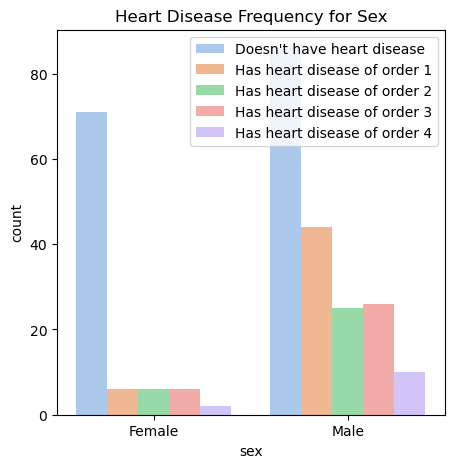

In [8]:
#See the distribution of data among sex
# This shows that: Males are more likely than females to get heart disease.

plt.figure(figsize=(5,5))
plt.title('Heart Disease Frequency for Sex')
sns.countplot(data=Cleveland_data,x='sex',hue='num',palette="pastel")
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Doesn't have heart disease", 'Has heart disease of order 1','Has heart disease of order 2','Has heart disease of order 3','Has heart disease of order 4'])
pd.crosstab(Cleveland_data.sex,Cleveland_data.num)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
num,,,,,,,,,,,,,,,,,,,,,
0,1,2,1,2,0,3,1,8,7,5,...,4,4,3,2,2,1,3,1,1,0
1,0,0,2,0,0,0,1,1,0,1,...,2,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,1,2,2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,1,...,0,1,2,1,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


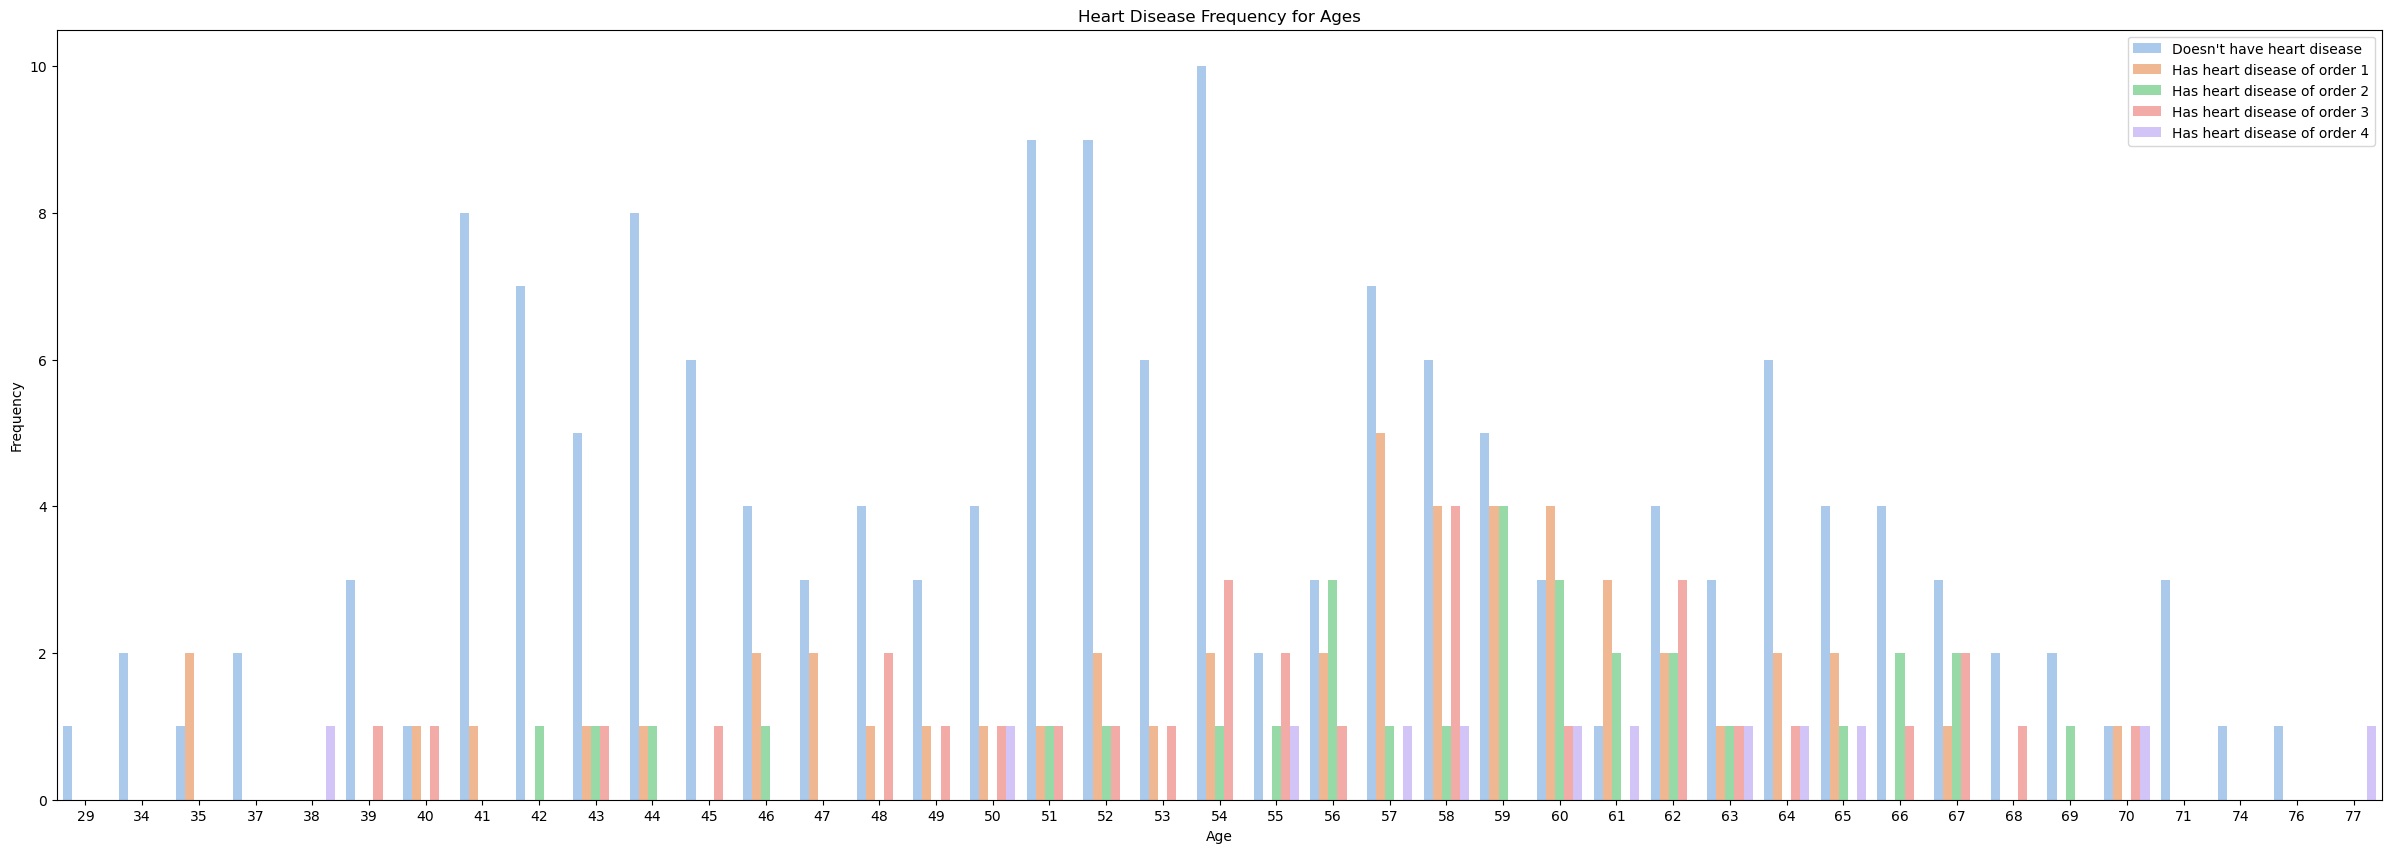

In [9]:
#See the distribution of data among age
#This shows that: Ages between 45-60 years are the most affected ones.
plt.figure(figsize=(30,10))
sns.countplot(x='age', data=Cleveland_data, hue='num',palette="pastel")
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Doesn't have heart disease", 'Has heart disease of order 1','Has heart disease of order 2','Has heart disease of order 3','Has heart disease of order 4'])
pd.crosstab(Cleveland_data.num,Cleveland_data.age)

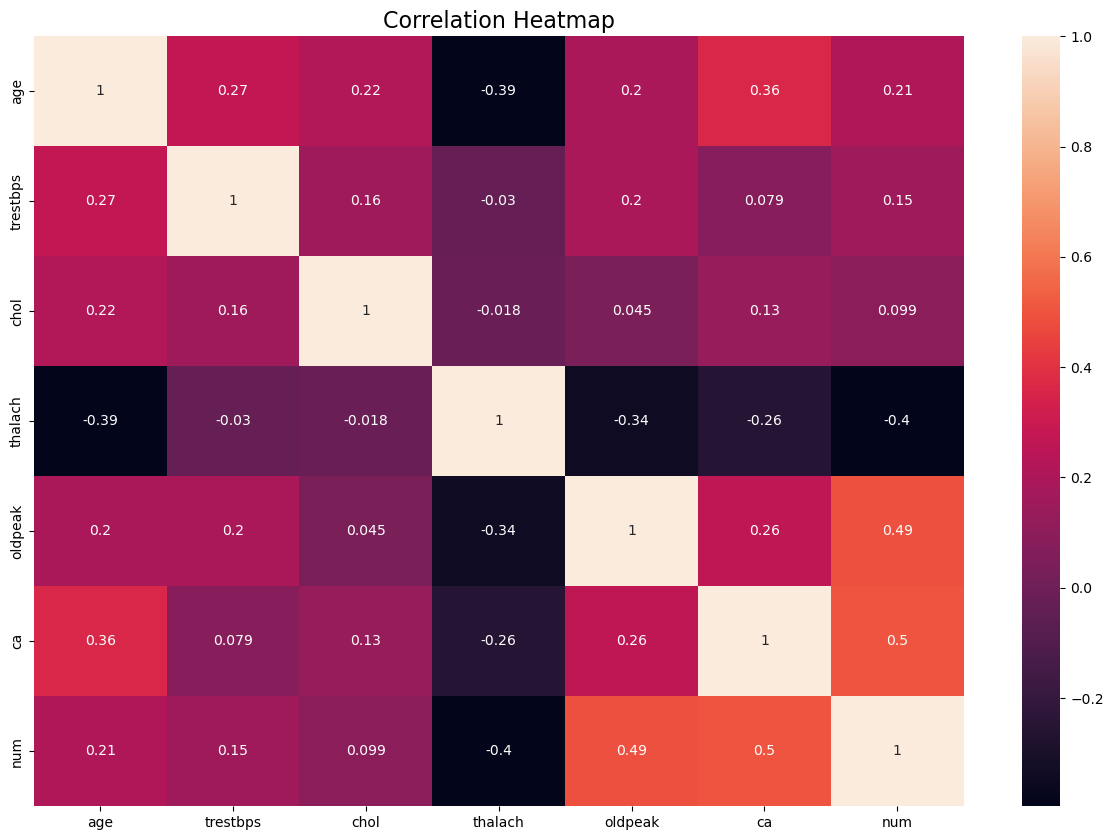

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.heatmap(Cleveland_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num']].corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


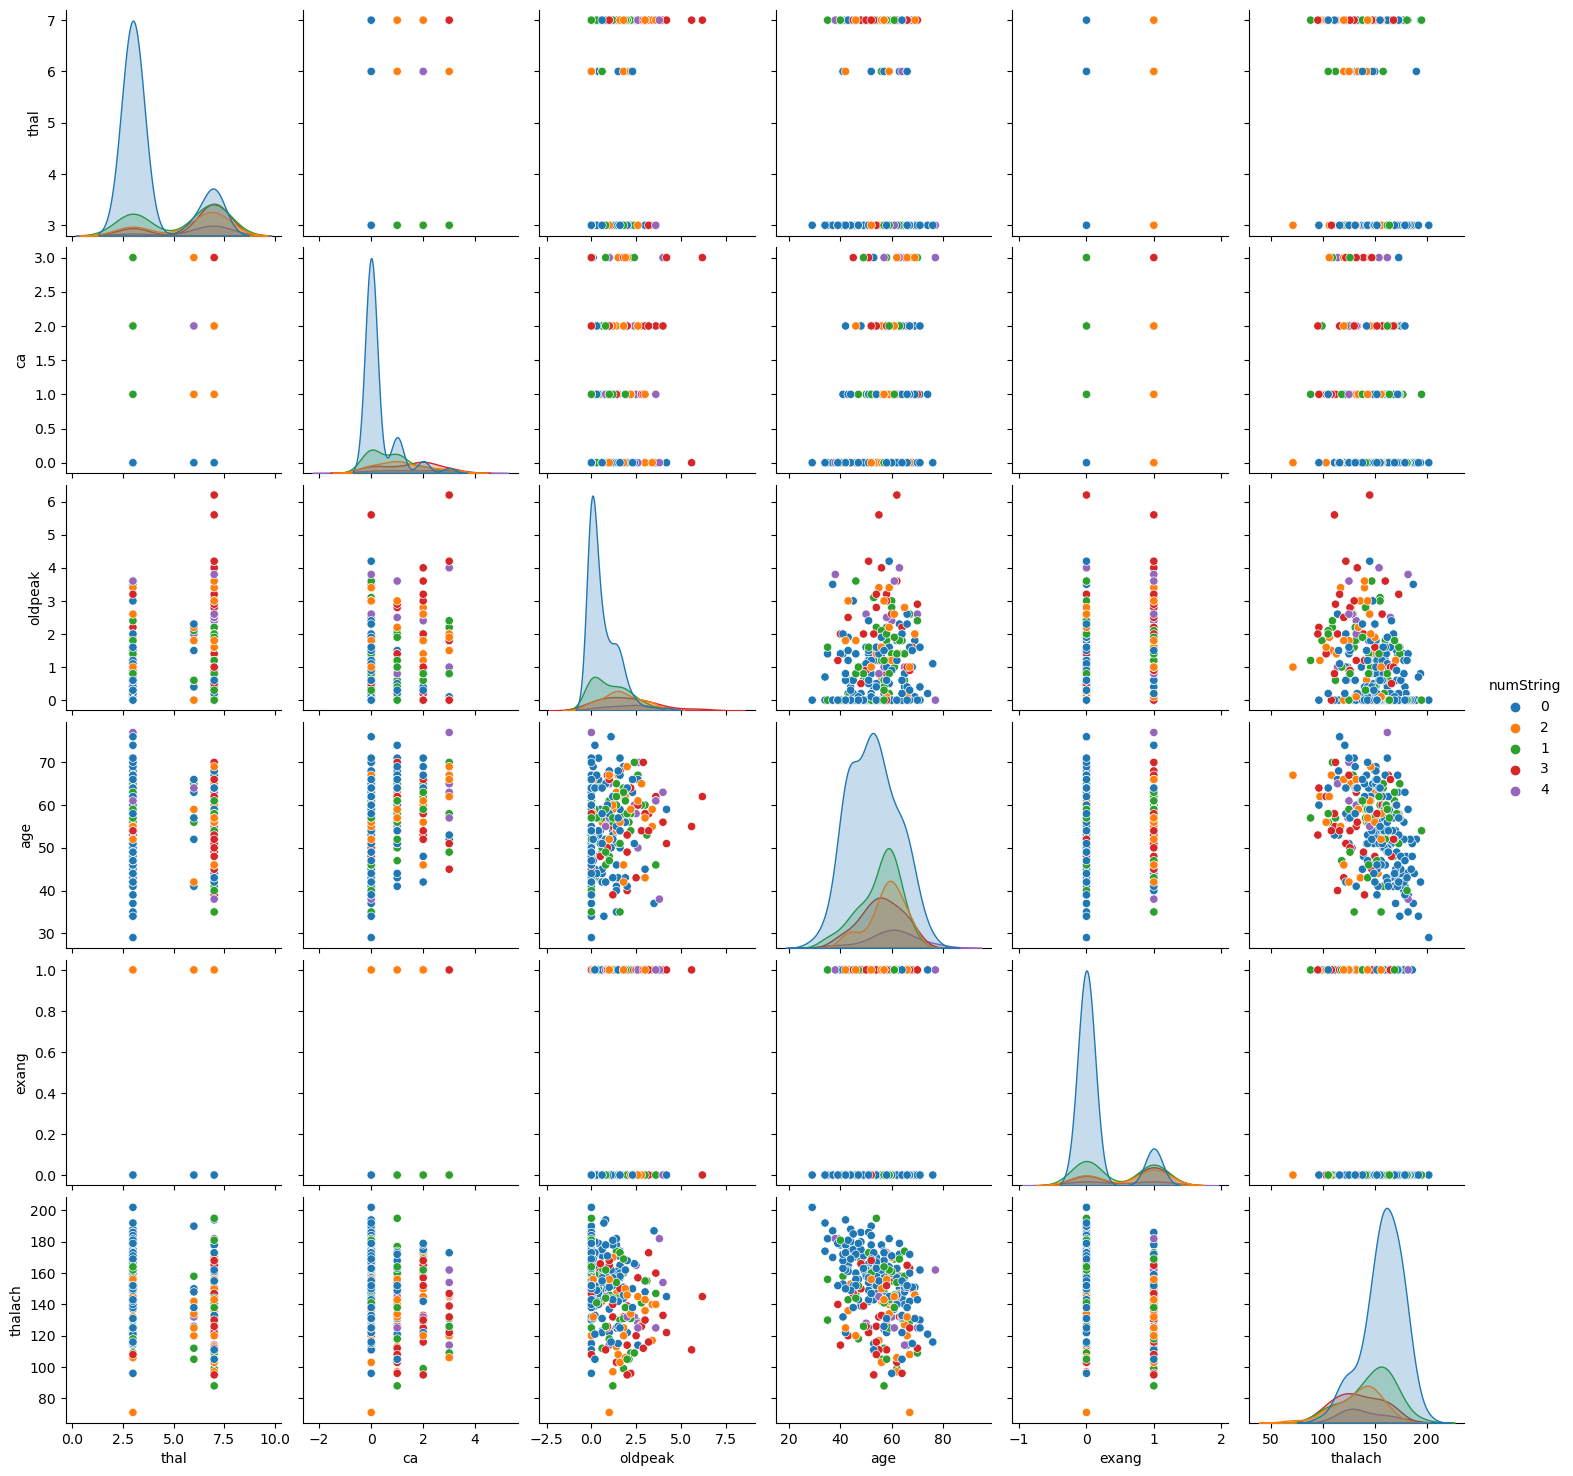

In [11]:
# do a pair plot of the highest correlated columns
# Change the data to string so it can have different colors. That will help us to see patterns better
Cleveland_data.loc[Cleveland_data['num'] == 0 , 'numString' ] = '0'
Cleveland_data.loc[Cleveland_data['num'] == 1 , 'numString' ] = '1'
Cleveland_data.loc[Cleveland_data['num'] == 2 , 'numString' ] = '2'
Cleveland_data.loc[Cleveland_data['num'] == 3 , 'numString' ] = '3'
Cleveland_data.loc[Cleveland_data['num'] == 4 , 'numString' ] = '4'

# choose variables with the highest correlation with num to do pairplot. We can definetly see some patterns with most
# most of these features
sns.pairplot(Cleveland_data[['thal',"ca",'oldpeak','age', 'exang', 'thalach', 'numString']], hue='numString')

In [12]:
# drop the num string column because it is no longer necessary 
Cleveland_data = Cleveland_data.drop(columns=['numString'])

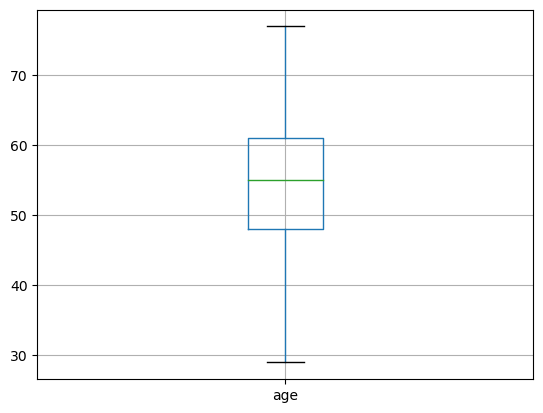

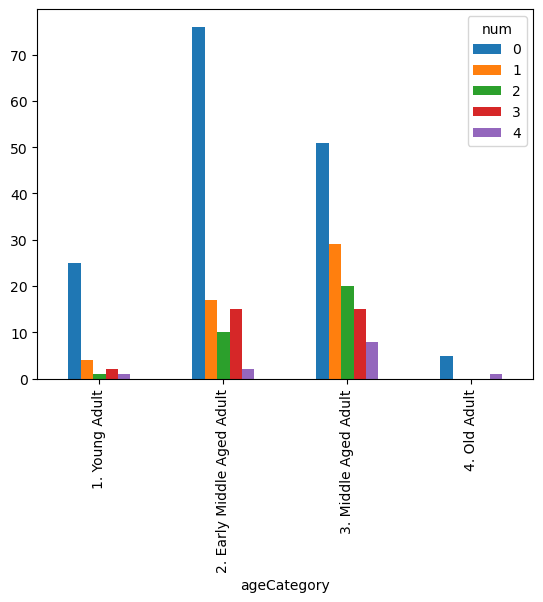

In [13]:
dataCopy = Cleveland_data.copy(deep=True)

# This will be used to classfiy the data info multiple age groups 
dataCopy[['age']].boxplot()

# replace the age with categorical variables  
dataCopy.loc[(dataCopy['age'] >= 29) & (dataCopy['age'] <= 42), 'ageCategory' ] = '1. Young Adult'
dataCopy.loc[(dataCopy['age'] >= 43) & (dataCopy['age'] <= 56), 'ageCategory' ] = '2. Early Middle Aged Adult'
dataCopy.loc[(dataCopy['age'] >= 57) & (dataCopy['age'] <= 70), 'ageCategory' ] = '3. Middle Aged Adult'
dataCopy.loc[(dataCopy['age'] >= 71) , 'ageCategory' ] = '4. Old Adult'

# create a visualization 
pd.crosstab(dataCopy['ageCategory'], dataCopy['num']).plot(kind='bar')

# encode the string categorical variable and drop the original age column 
encoder = OrdinalEncoder()
dataTest = encoder.fit_transform(dataCopy[['ageCategory']])
dataCopy['ageEncoded'] = dataTest
dataCopy = dataCopy.drop(columns=["ageCategory"])
dataCopy = dataCopy.drop(columns=["age"])

## Data Transformation:

PCA (Principal Component Analysis): Used for feature reduction by identifying the most important components that capture maximum variance in the data.<br>

Scaling: Applied to ensure fair weighting of features, preventing those with larger values from dominating the analysis.<br>

Feature Selection: Initially attempted but found that including all features after PCA yielded higher accuracy.<br>

Encoding: String values (e.g., age categories) were transformed into numerical representations for incorporation into the model.<br>

Dummy Variables: Created for nominal data with integer values to provide appropriate information to the model.

In [14]:
dataCopy['ageEncoded'] = dataCopy['ageEncoded'].astype(int)


In [15]:
# divide x data and y data 
x_data = Cleveland_data.drop(columns = ['num'])
y_data = Cleveland_data['num']

In [16]:
# Feature selection - with highest correlation and lowest p value depending on the type of the feature 
x_dataCopy = dataCopy.drop(columns = ['num'])
x_featureSelected = Cleveland_data[['thal',"ca",'oldpeak','age', 'exang', 'thalach']]

In [17]:
# Get dummy variables for the nominal data 
ageDummy = pd.get_dummies(dataCopy['ageEncoded'], prefix='age')
cpDummy = pd.get_dummies(dataCopy['cp'], prefix='cp')
thalDummy = pd.get_dummies(dataCopy['thal'], prefix='thal')
slopeDummy = pd.get_dummies(dataCopy['slope'], prefix='slope')
restecgDummy = pd.get_dummies(dataCopy['restecg'], prefix='restecg')

# merge the dummy variables 
frames = [dataCopy, cpDummy, thalDummy,slopeDummy,restecgDummy, ageDummy]
dataDummy = pd.concat(frames, axis=1)

#drop the original data set
dataDummy = dataDummy.drop(columns=['cp', 'thal','slope', 'restecg', 'ageEncoded'])
dataDummy.head()
dataDummy.columns

Index(['id', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'num', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'thal_3', 'thal_6',
       'thal_7', 'slope_1', 'slope_2', 'slope_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'age_0', 'age_1', 'age_2', 'age_3'],
      dtype='object')

In [18]:
# pca calculator and show graph shows the explained variance graph 
def pcaCalculator(x_data, components, showgraph = False):
    pca = PCA(n_components=components) #0.80
    x_data = StandardScaler().fit_transform(x_data)
    comp = pca.fit_transform(x_data)
    df = pd.DataFrame(data = comp)
    
    if(showgraph):
        pc_values = np.arange(pca.n_components_) + 1
        plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
        plt.title('Scree Plot')
        plt.xlabel('Components')
        plt.ylabel('Variance Proportion')
        plt.show()
    return df

In [19]:
x_data.isnull().any()

id          False
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
dtype: bool

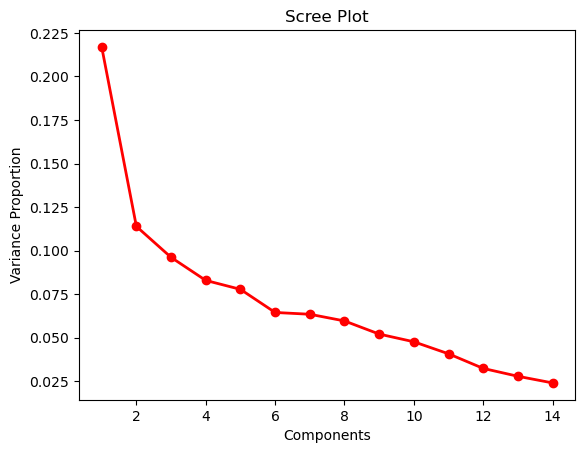

In [20]:
# PCA of the data 
# Since the variance begins to decline from this point, we will choose 8 as the ideal component.

pcaData = pcaCalculator(x_data,len(x_data.columns), True)

In [21]:
# pca with optical n =8
pcaData = pcaCalculator(x_data,8)

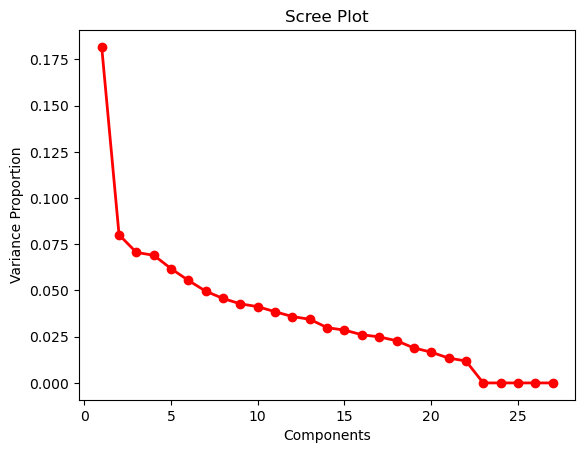

In [22]:
# PCA of the data with all nominal data changed into dummy variables 
# Since the variance begins to decline from this point, we will choose 20 as the ideal component.

dummyData = pcaCalculator(dataDummy,len(dataDummy.columns), True)

In [23]:
# 22 seems the optimal component 
dummyData = pcaCalculator(dataDummy,23)

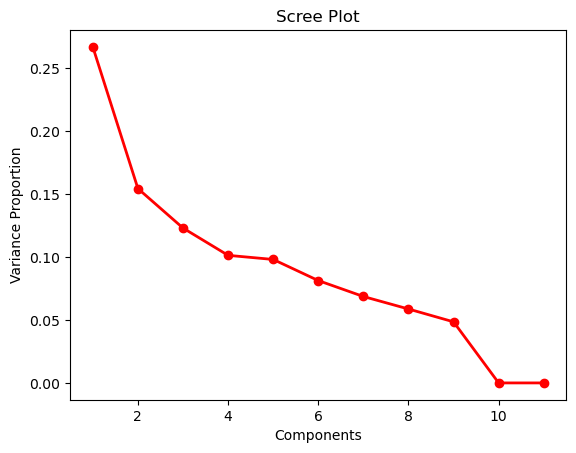

In [24]:
# PCA of feature selected data
featureSelected = dataDummy[['thal_3', 'thal_6', 'thal_7',"ca",'oldpeak','age_0', 'age_1', 'age_2', 'age_3', 'exang', 'thalach']]
featurePCA = pcaCalculator(featureSelected, len(featureSelected.columns), True)

##  Evaluation of the Off-The-Shelf KNN Classifier

Separate the data into test and train sets. This will be applied to every classifier.
Cross-validation configuration is used to evaluate the data set, returning accuracy for each fold. Cross_val_scores can be used to accomplish this.

In [32]:
# Split the three data points that will be compared 
X_train, X_test, y_train, y_test = train_test_split(pcaData, y_data, test_size=0.33 , random_state=42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(dummyData, y_data, test_size=0.33 , random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(featurePCA, y_data, test_size=0.33 , random_state=42)

In [33]:
# Evaluate the data set taking cross validation config and returning accuracy for each fold

def cvScores(X_train, X_test, y_train, y_test):
    k_list = list(range(1,50,1))
    # creating list of cv scores
    knn_cv_scores = []

    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn_scores = cross_val_score(knn, X_train, y_train.squeeze(), cv=7, scoring='accuracy')
        knn_cv_scores.append(knn_scores.mean())
    return knn_cv_scores, knn_cv_scores.index(max(knn_cv_scores)) + 1

In [54]:
# Plot the knn accuracy vs n
def plotKnn(knn_cv_scores):
    k_list = list(range(1,50,1))
    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, knn_cv_scores)
    plt.show()

In [47]:
def measurement(y_test, y_pred):
    print('Accuracy Percent ' + str(accuracy_score(y_test,y_pred) * 100))
    print('Confusion Matrix')
    print(confusion_matrix(y_test , y_pred))
    print('Classification Report')
    print(classification_report(y_test, y_pred, zero_division=1)) 

In [52]:
#code for plots
plt.style.use('ggplot')

def make_multi_roc(y_test_binary, y_scores, title, n_classes = 3):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of class {0} (area = {1:0.5f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' - ROC for multi-class data')
    plt.legend(loc="lower right")
    plt.show() 

In [48]:
# Call knn final time with the optimal n
# Code from class 
def finalN(X_train, X_test, y_train, y_test,n):
    knn_classifier = KNeighborsClassifier(n_neighbors=n)

    knn_classifier.fit(X_train, y_train.squeeze())

    # Predicting the Test set results
    knn_pred = knn_classifier.predict(X_test)

    confusionMx = confusion_matrix(y_test, knn_pred)

   # measurment function defined to give evaluators 
    measurement(y_test,knn_pred)

    
    knn_y_scores = knn_classifier.predict_proba(X_test)
    y_test_binary = label_binarize(y_test, classes = [0,1,2,3,4])

    #Make ROC for the 5 classes
    # Since it has more than 2 classes, we can't create only one ROC
    make_multi_roc(y_test_binary, knn_y_scores, "kNN", 5)

## Run and evaluate the classifier



The data that included dummy variables and went through PCA with its ideal n-components achieved the highest accuracy (59.5%) and net benefit.



Highest accuracy is achieved by n= 11


<Figure size 640x480 with 0 Axes>

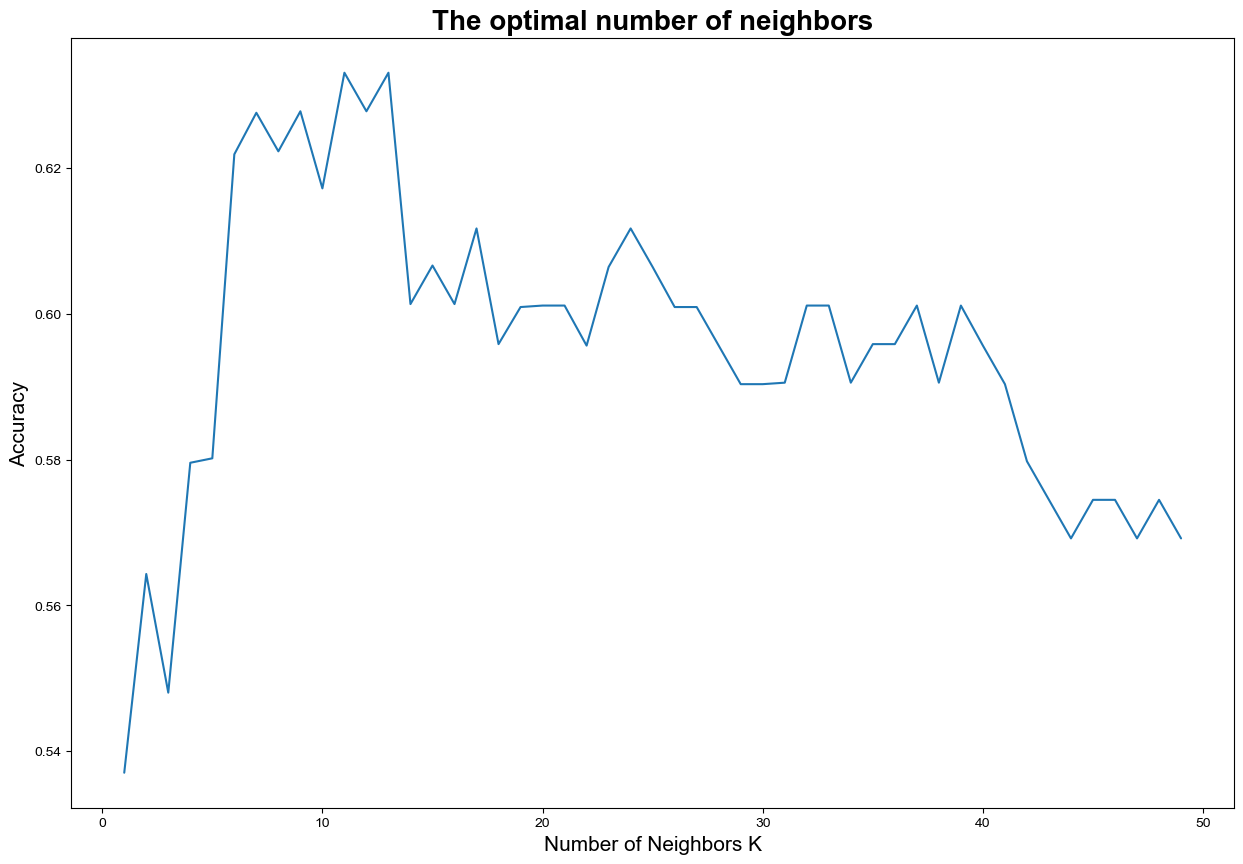

In [36]:
# CV scores for the data that was just run through PCA 
scores = cvScores(X_train, X_test, y_train, y_test)
print("Highest accuracy is achieved by n=", str(scores[1]))
plotKnn(scores[0])

Accuracy Percent 55.319148936170215
Confusion Matrix
[[49  2  1  0  0]
 [10  2  3  1  0]
 [ 1  5  1  0  0]
 [ 5  6  3  0  0]
 [ 2  2  1  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.12      0.12      0.12        16
           2       0.11      0.14      0.12         7
           3       0.00      0.00      0.00        14
           4       1.00      0.00      0.00         5

    accuracy                           0.55        94
   macro avg       0.39      0.24      0.21        94
weighted avg       0.49      0.55      0.49        94



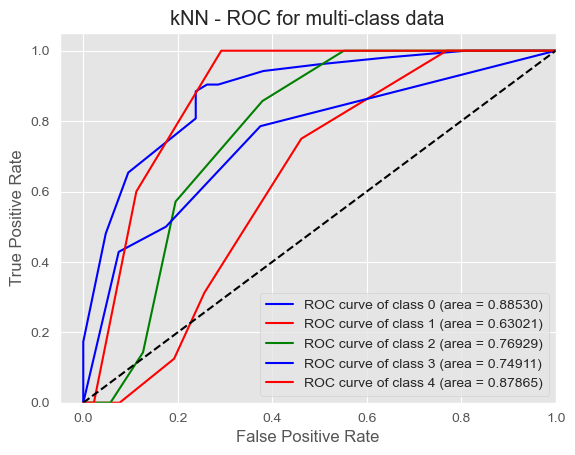

In [51]:
finalN(X_train, X_test, y_train, y_test, scores[1])


Highest accuracy is achieved by n= 10


<Figure size 640x480 with 0 Axes>

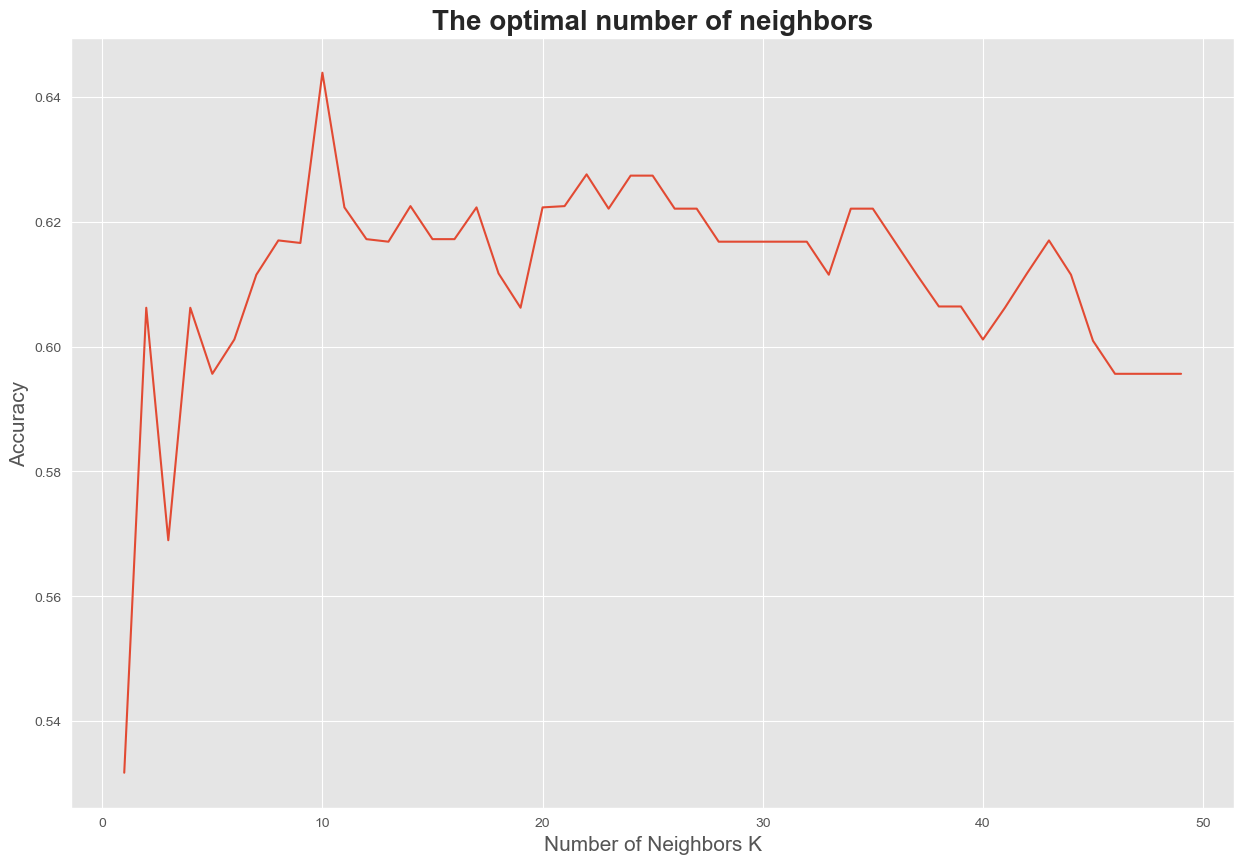

In [55]:
# Data with nominal features encoded into dummy variables 
scores1 = cvScores(X_train1, X_test1, y_train1, y_test1)
print("Highest accuracy is achieved by n=", str(scores1[1]))
plotKnn(scores1[0])

Accuracy Percent 56.38297872340425
Confusion Matrix
[[46  4  2  0  0]
 [ 9  1  4  2  0]
 [ 0  4  3  0  0]
 [ 2  3  6  3  0]
 [ 1  0  4  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        52
           1       0.08      0.06      0.07        16
           2       0.16      0.43      0.23         7
           3       0.60      0.21      0.32        14
           4       1.00      0.00      0.00         5

    accuracy                           0.56        94
   macro avg       0.53      0.32      0.29        94
weighted avg       0.61      0.56      0.54        94



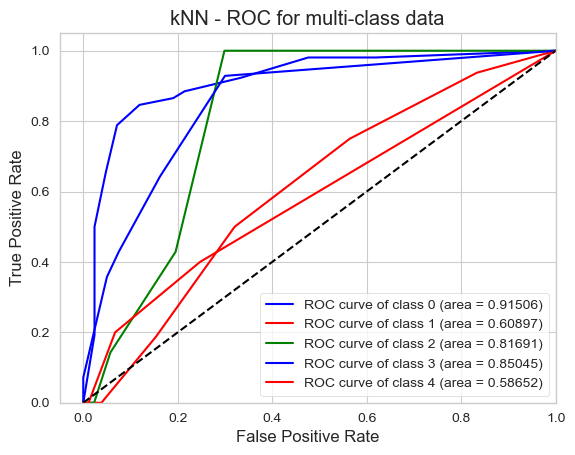

In [56]:
# Final knn with n that results in higest accuracy
finalN(X_train1, X_test1, y_train1, y_test1, scores1[1])

Highest accuracy is achieved by n= 10


<Figure size 640x480 with 0 Axes>

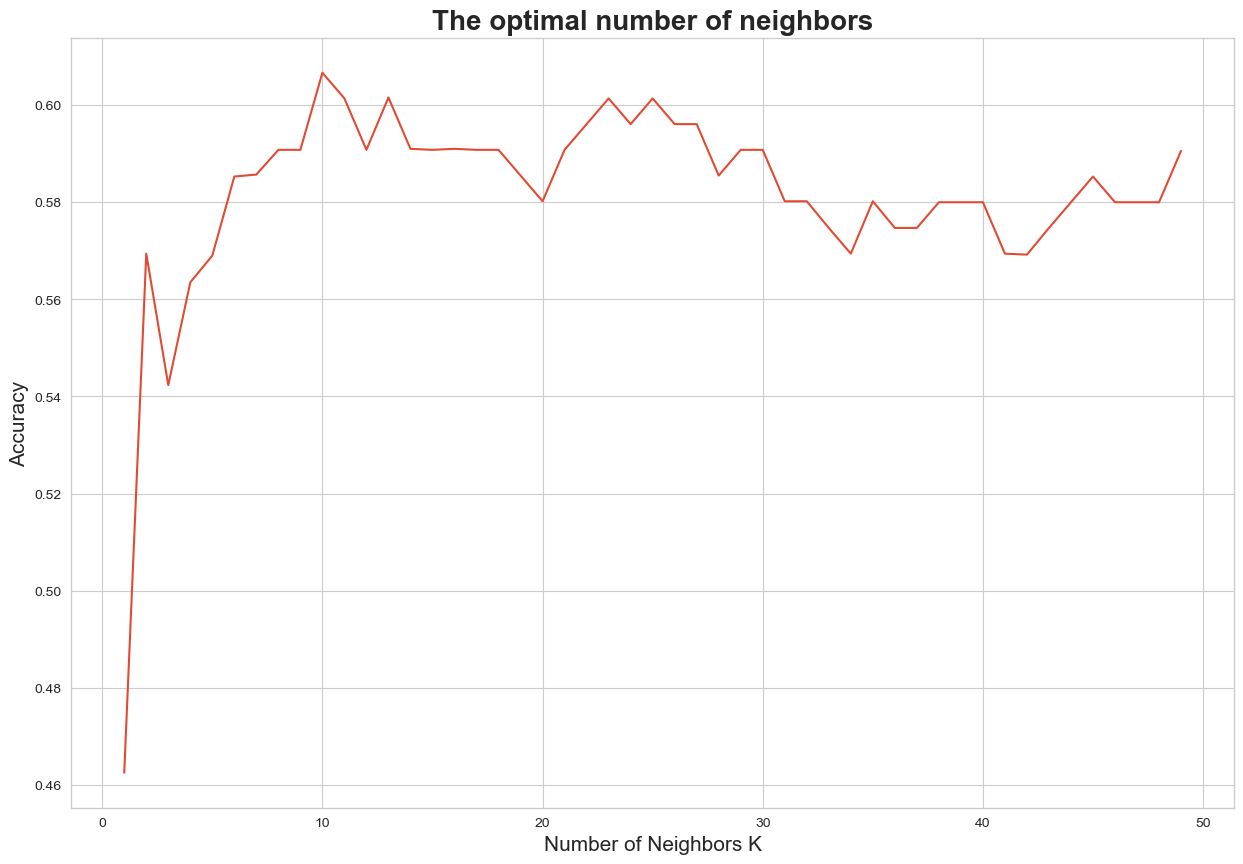

In [57]:
# dummy variable and feature selected 
scores2 = cvScores(X_train2, X_test2, y_train2, y_test2)
print("Highest accuracy is achieved by n=", str(scores2[1]))
plotKnn(scores2[0])

Accuracy Percent 57.446808510638306
Confusion Matrix
[[50  1  1  0  0]
 [11  1  4  0  0]
 [ 1  4  2  0  0]
 [ 6  4  3  1  0]
 [ 3  1  1  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        52
           1       0.09      0.06      0.07        16
           2       0.18      0.29      0.22         7
           3       1.00      0.07      0.13        14
           4       1.00      0.00      0.00         5

    accuracy                           0.57        94
   macro avg       0.60      0.28      0.25        94
weighted avg       0.62      0.57      0.50        94



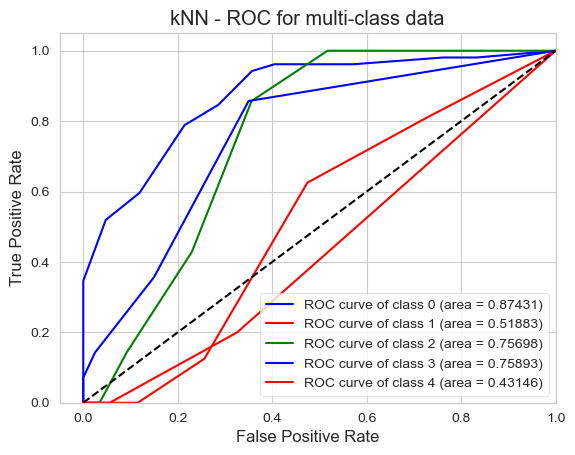

In [58]:
# Final knn with n that results in higest accuracy
finalN(X_train2, X_test2, y_train2, y_test2, scores2[1])